In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from matplotlib.ticker import AutoMinorLocator
from matplotlib.patches import Rectangle

In [3]:
data = pd.read_csv("CoRoT-stats-Balanced-final.csv", delimiter=';')
data

,Group,Participants,Success,Std,conf_lo,conf_hi,Useful,More
0,Global,40,0.5562,0.1519,0.5167,0.5950,90.00,72.50
1,Experts,18,0.7222,0.1977,0.6666,0.7716,88.88,83.33
2,Non-experts,18,0.4722,0.1064,0.4142,0.5310,88.88,66.66
3,Astronomers,4,0.5625,0.3750,0.4384,0.6790,75.00,50.00
4,Musicians,4,0.6250,0.1443,0.4999,0.7350,100.00,100.00
5,AstroMus,4,0.8125,0.2239,0.6977,0.8895,75.00,100.00
6,4-nonEx,4,0.5000,0.2886,0.3788,0.6212,75.00,50.00


In [4]:
data['Success'][0]

0.5562

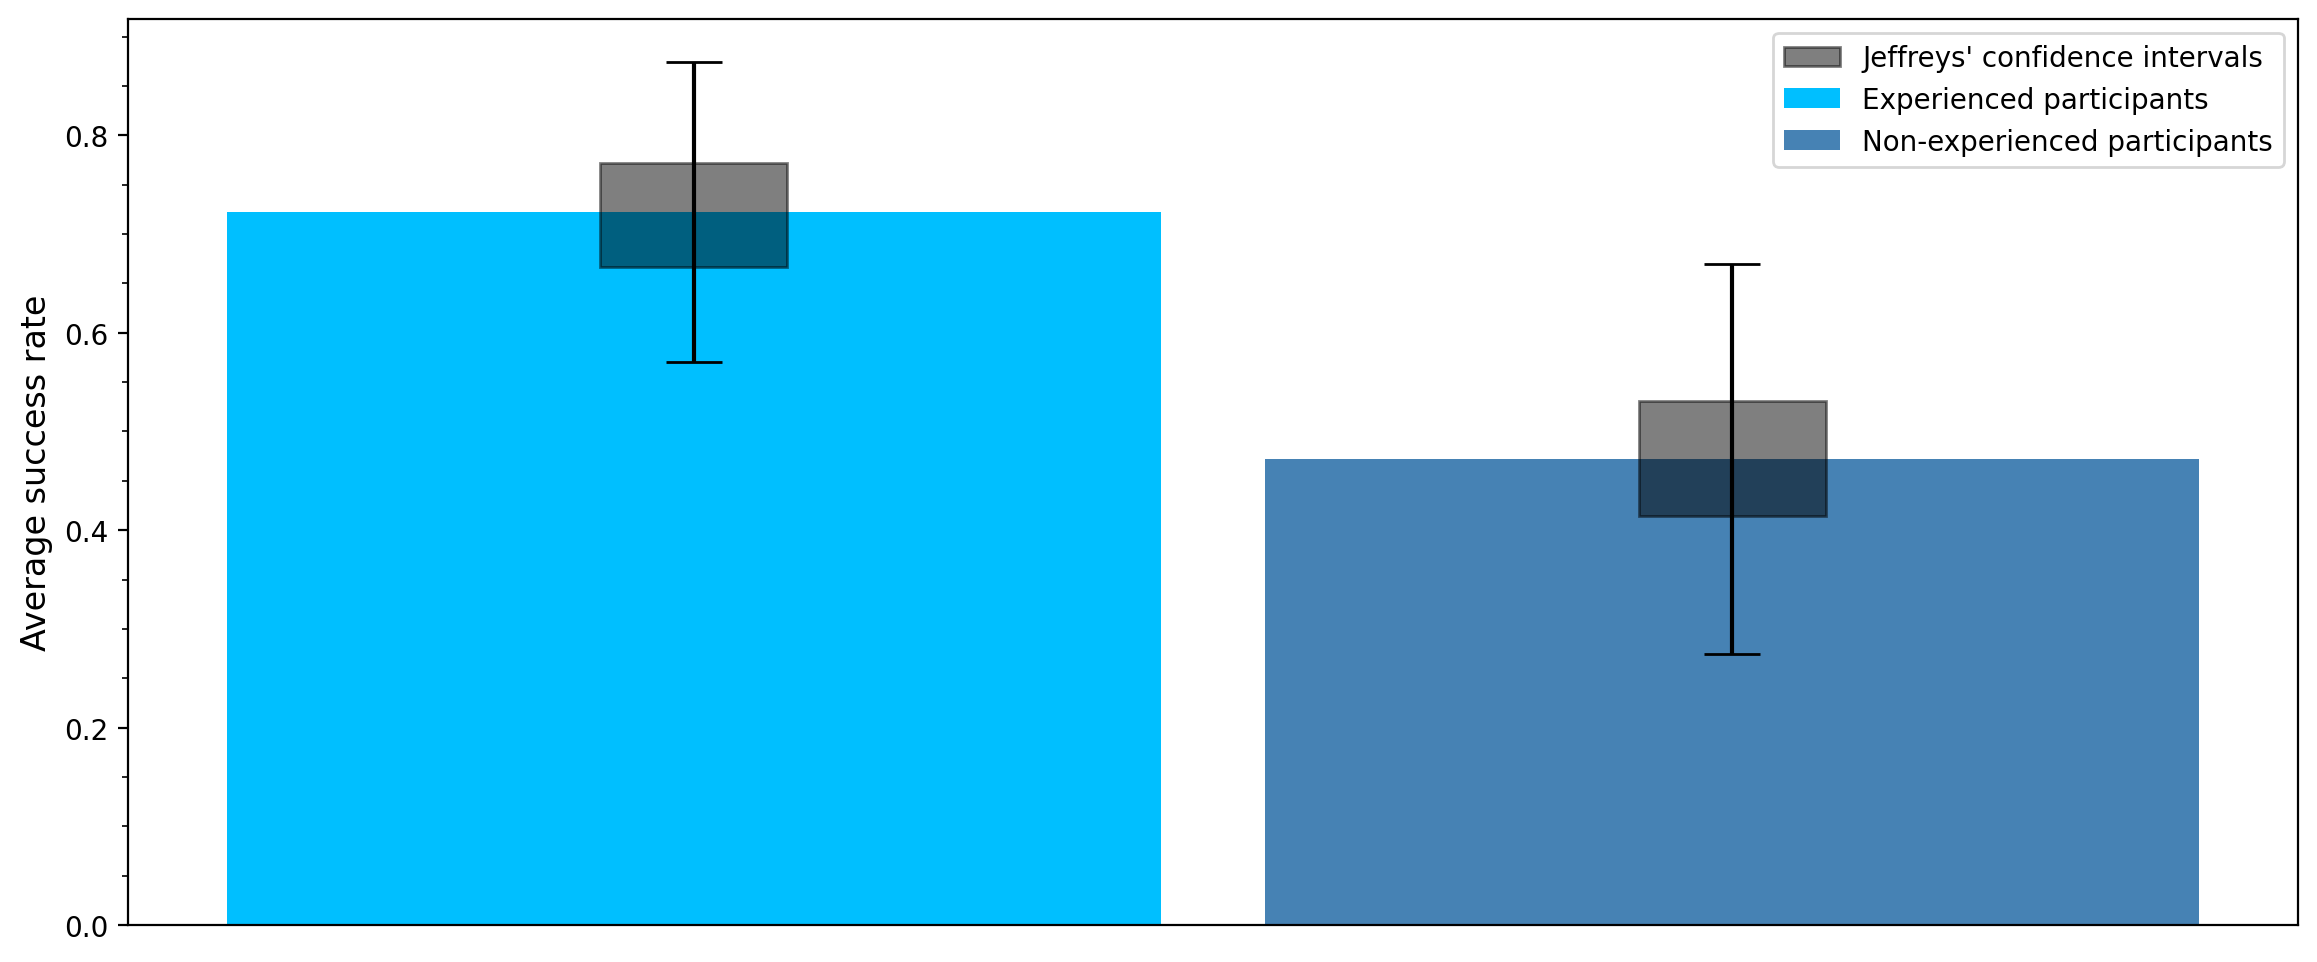

In [5]:
labels = ['Global','Experts','Non-experts']

fig, ax = plt.subplots(figsize=(14,6),dpi=200)
x = np.arange(len(labels))

bar_width = .9

#rects0 = ax.bar(1 - bar_width/2, data['Success'][0] , bar_width, yerr=data['Std'][0], 
#                label='Global results',align='center',ecolor='black',capsize=10)
rects1 = ax.bar(1 - bar_width/2, data['Success'][1] , bar_width, yerr=data['Std'][0], 
                label='Experienced participants',align='center', color = 'deepskyblue', ecolor='black',capsize=10)
rects2 = ax.bar(2 - bar_width/2, data['Success'][2] , bar_width, yerr=data['Std'][1], 
                label='Non-experienced participants',align='center', color = 'steelblue', ecolor='black',capsize=10)
ax.set_ylabel('Average success rate',size=12)
ax.yaxis.set_minor_locator(AutoMinorLocator())

#ax.add_patch(Rectangle((.46, data['conf_lo'][0]), 
#                       0.18, data['conf_hi'][0]-data['conf_lo'][0],
#                       alpha=0.5,color='black',label="Jeffreys' confidence intervals"))
ax.add_patch(Rectangle((0.46, data['conf_lo'][1]), 
                       0.18, data['conf_hi'][1]-data['conf_lo'][1],
                       alpha=0.5,color='black',label="Jeffreys' confidence intervals"))
ax.add_patch(Rectangle((1.46, data['conf_lo'][2]), 
                       0.18, data['conf_hi'][2]-data['conf_lo'][2],
                       alpha=0.5,color='black'))

ax.set_xticks([])
ax.set_xticklabels([])

ax.legend(fontsize=10,loc='upper right')
plt.savefig('ICAD24_CoRot-stats-Plot.png')
plt.show()

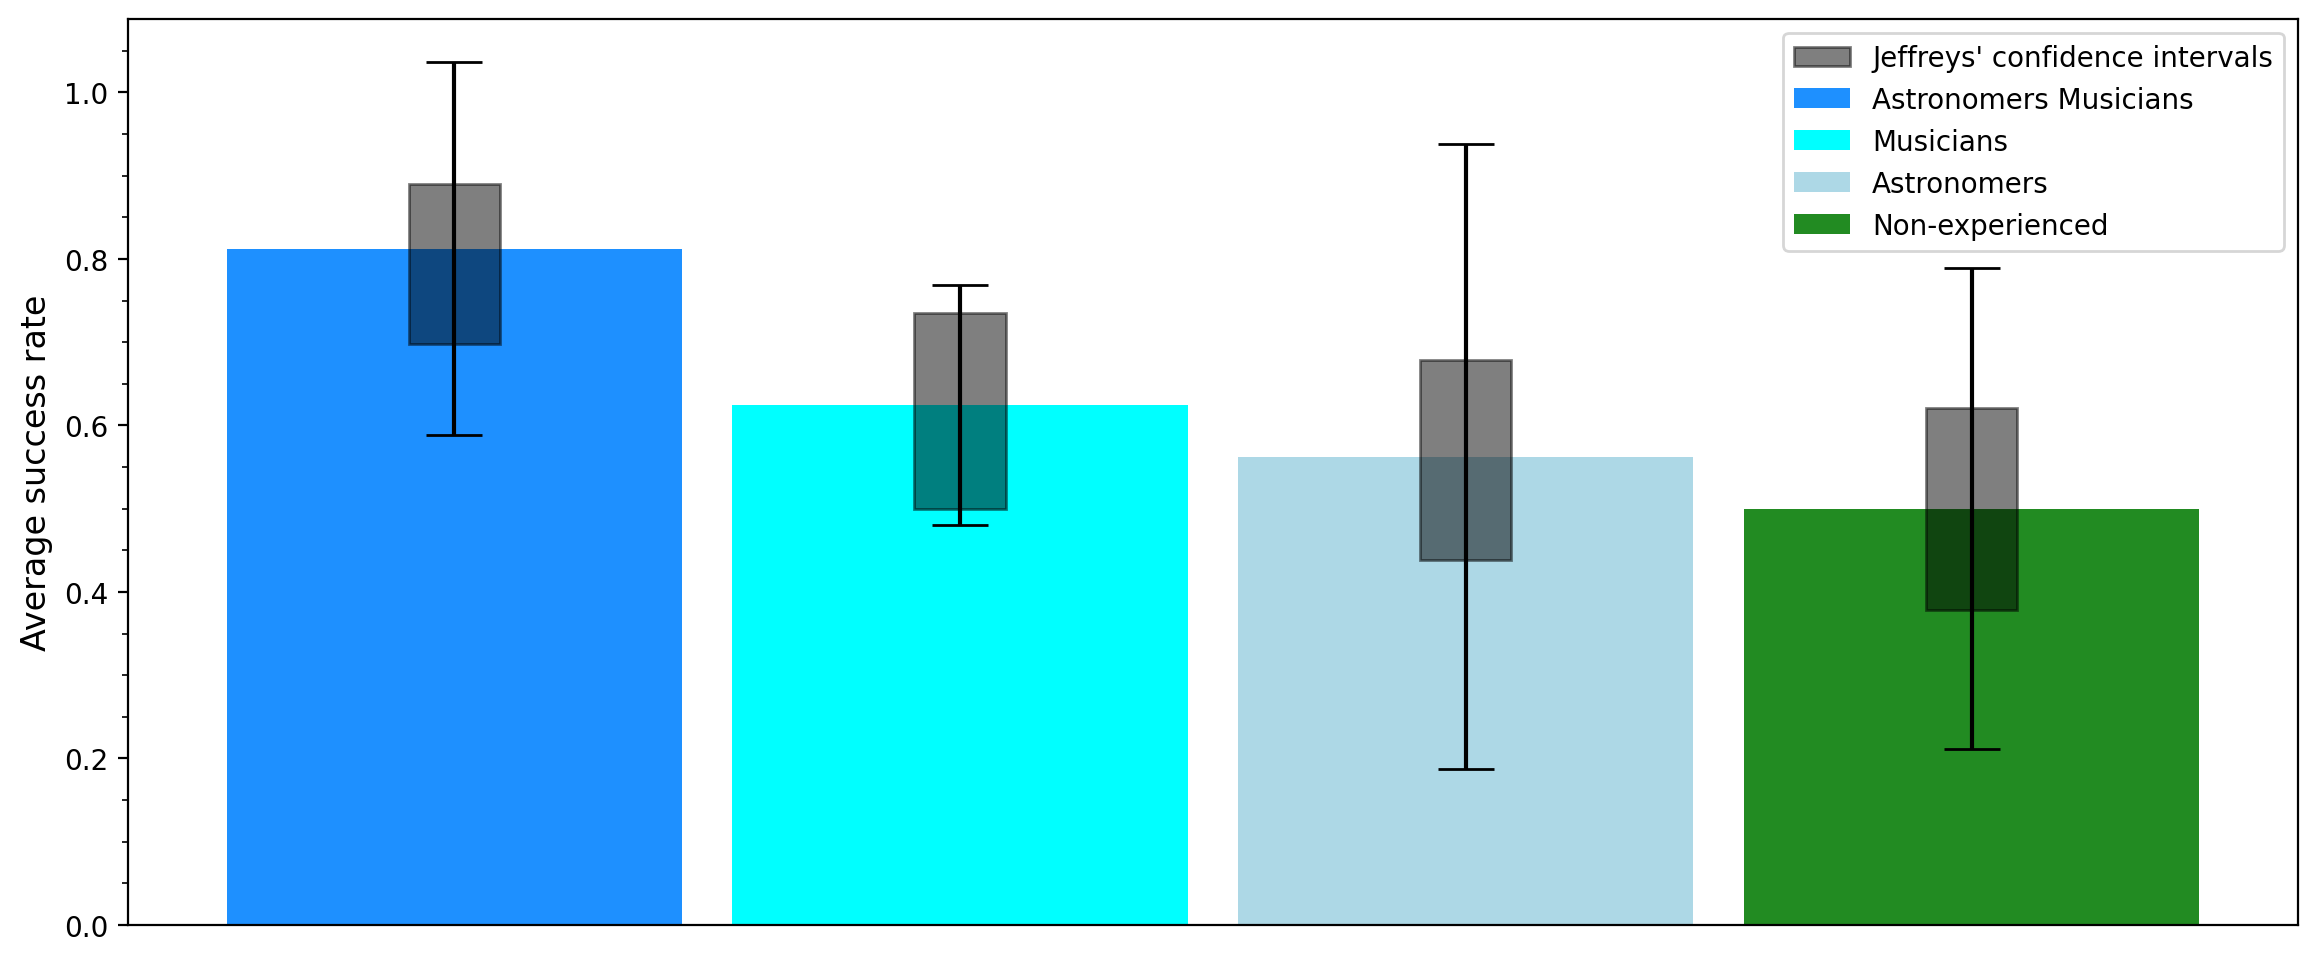

In [12]:
fig, ax = plt.subplots(figsize=(14,6),dpi=200)
x = np.arange(len(labels))
bar_width = .9
rects1 = ax.bar(1 - bar_width/2, data['Success'][5] , bar_width, yerr=data['Std'][5], 
                label='Astronomers Musicians',color='dodgerblue', align='center',ecolor='black',capsize=10)
rects2 = ax.bar(2 - bar_width/2, data['Success'][4] , bar_width, yerr=data['Std'][4], 
                label='Musicians', color='cyan', align='center',ecolor='black',capsize=10)
rects3 = ax.bar(3 - bar_width/2, data['Success'][3] , bar_width, yerr=data['Std'][3], 
                label='Astronomers', color = 'lightblue', align='center',ecolor='black',capsize=10)

rects4 = ax.bar(4 - bar_width/2, data['Success'][6] , bar_width, yerr=data['Std'][6], 
                label='Non-experienced', color = 'forestgreen', align='center',ecolor='black',capsize=10)


ax.set_ylabel('Average success rate',size=12)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.add_patch(Rectangle((.46, data['conf_lo'][5]), 
                       0.18, data['conf_hi'][5]-data['conf_lo'][5],
                       alpha=0.5,color='black',label="Jeffreys' confidence intervals"))
ax.add_patch(Rectangle((1.46, data['conf_lo'][4]), 
                       0.18, data['conf_hi'][4]-data['conf_lo'][4],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((2.46, data['conf_lo'][3]), 
                       0.18, data['conf_hi'][3]-data['conf_lo'][3],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((3.46, data['conf_lo'][6]), 
                       0.18, data['conf_hi'][6]-data['conf_lo'][6],
                       alpha=0.5,color='black'))

ax.set_xticks([])
ax.set_xticklabels([])
ax.legend(fontsize=10,loc='upper right')
plt.savefig('ICAD24_CoRot-stats-Plot-groups.png')
plt.show()

In [7]:
data['Useful'][0]

90.0

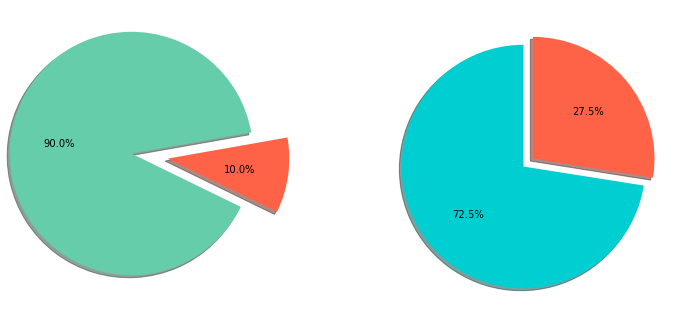

In [8]:
labels = 'Yes', 'No'
useful = [data['Useful'][0], 100-data['Useful'][0]]
more = [data['More'][0], 100-data['More'][0]]

explode = (0.3, 0)
explode2 = (0.1, 0)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].pie(useful, explode=explode, shadow= True, autopct='%1.1f%%', startangle=10, colors=['mediumaquamarine', 'tomato'])
ax[1].pie(more, explode=explode2, shadow= True, autopct='%1.1f%%', startangle=90, colors=['darkturquoise', 'tomato'])
plt.savefig('ICAD24_CoRot-Global.png')
plt.show()